# Imports

In [1]:
# Data processing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning libraries

import keras
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image

# Analysis libraries

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Utils libraries

import kagglehub
import time
import random
import datetime

# Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data management

In [4]:
# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")
DATASET_URI= path + "/raw-img"

# Determine the unique seed for our data

random.seed(10)
seed = random.randint(1, 200)

# Determine the image and batch sizes

batch_size = 64

img_height = 224
img_width = 224
image_size = (img_height, img_width)

# Determine the validation split (ie. 90% train, 10% test for ex.)
validation_split = 0.2 # Split of 20%

test_ds = keras.utils.image_dataset_from_directory(
  directory = DATASET_URI,
  validation_split = validation_split,
  subset = "validation",
  seed = seed,
  image_size = image_size,
  batch_size = batch_size,
  shuffle = True
)

italian_to_english = {
    'cane': 'dog',
    'cavallo': 'horse',
    'elefante': 'elephant',
    'farfalla': 'butterfly',
    'gallina': 'chicken',
    'gatto': 'cat',
    'mucca': 'cow',
    'pecora': 'sheep',
    'ragno': 'spider',
    'scoiattolo': 'squirrel'
}

class_names = np.array([italian_to_english[name] for name in test_ds.class_names])
num_classes = len(class_names)

# Normalizing the data
normalization_layer = keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Auto-tuning our data
AUTOTUNE = tf.data.AUTOTUNE
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [6]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 3)
(64,)


# Model JJ_1

In [5]:
# Import
m1 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m1_JJ.keras")

# Predict
m1_predicted_batch = m1.predict(test_ds)
m1_predicted_id = tf.math.argmax(m1_predicted_batch, axis=-1)
m1_predicted_label_batch = class_names[m1_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step


## Image visualisation

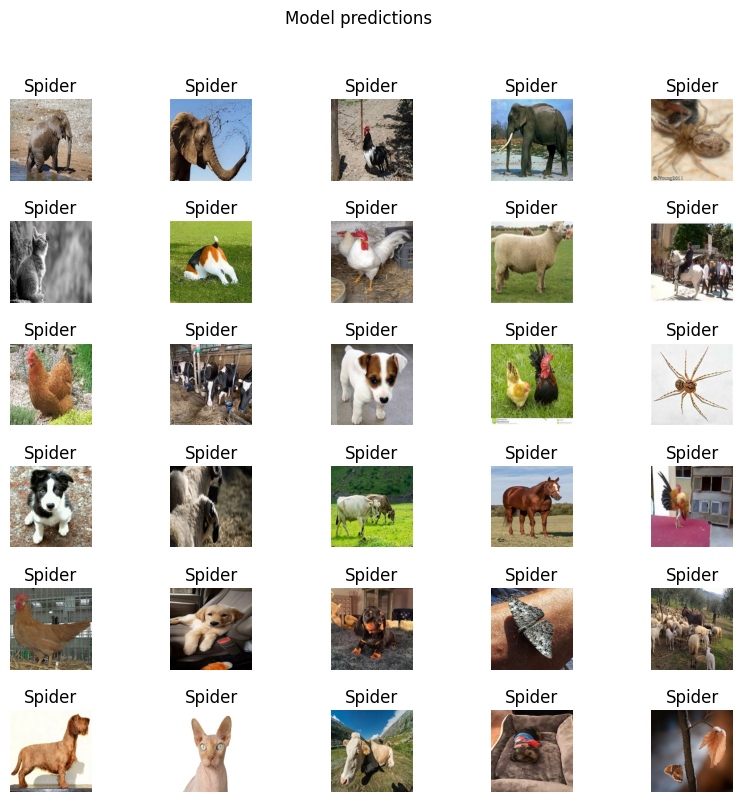

In [9]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m1_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

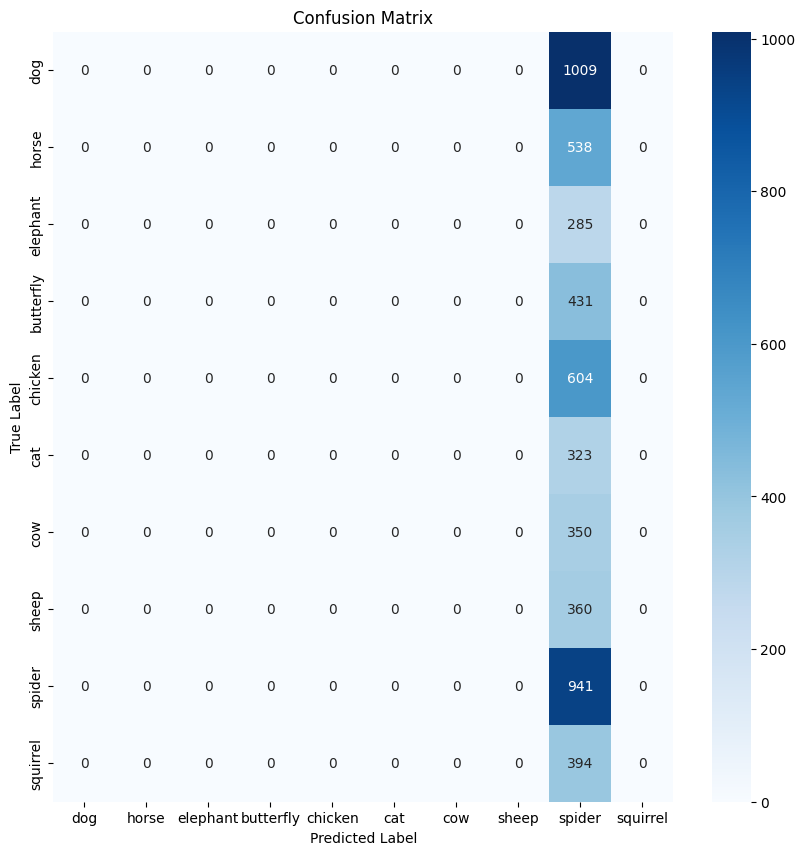

In [11]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m1_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [13]:
# Generate classification report
report = classification_report(true_labels, m1_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.00      0.00      0.00       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.18      1.00      0.30       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.18      5235
   macro avg       0.02      0.10      0.03      5235
weighted avg       0.03      0.18      0.05      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [14]:
test_loss, test_acc = m1.evaluate(test_ds, verbose=1)
print('Test loss Model 1 => ', test_loss)
print('Test accuracy Model 1 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1799 - loss: 8.6508
Test loss Model 1 =>  8.738760948181152
Test accuracy Model 1 =>  0.1797516644001007


# Model JJ_2

In [ ]:
# Import
m1 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m1_JJ.keras")

# Predict
m1_predicted_batch = m1.predict(test_ds)
m1_predicted_id = tf.math.argmax(m1_predicted_batch, axis=-1)
m1_predicted_label_batch = class_names[m1_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step


## Image visualisation

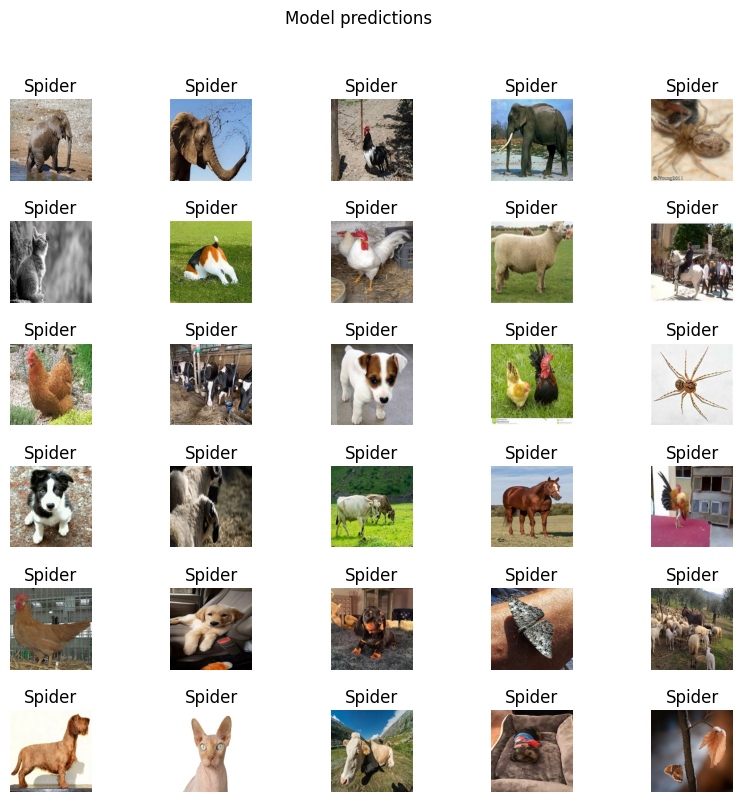

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m1_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

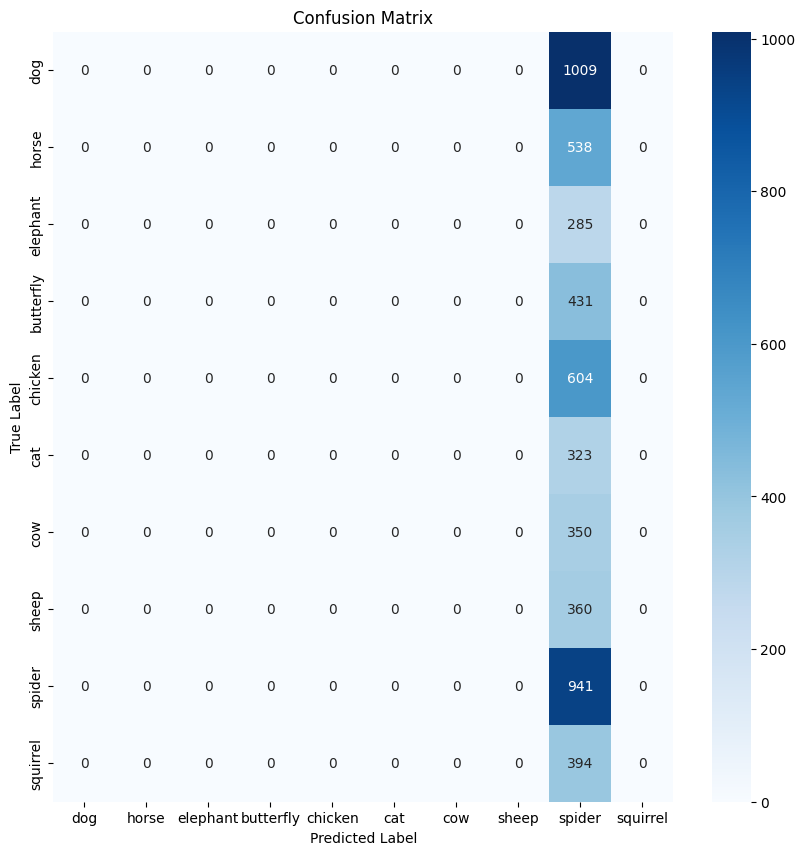

In [ ]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m1_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [ ]:
# Generate classification report
report = classification_report(true_labels, m1_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.00      0.00      0.00       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.18      1.00      0.30       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.18      5235
   macro avg       0.02      0.10      0.03      5235
weighted avg       0.03      0.18      0.05      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [ ]:
test_loss, test_acc = m1.evaluate(test_ds, verbose=1)
print('Test loss Model 1 => ', test_loss)
print('Test accuracy Model 1 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1799 - loss: 8.6508
Test loss Model 1 =>  8.738760948181152
Test accuracy Model 1 =>  0.1797516644001007


# Model JJ_3

In [ ]:
# Import
m1 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m1_JJ.keras")

# Predict
m1_predicted_batch = m1.predict(test_ds)
m1_predicted_id = tf.math.argmax(m1_predicted_batch, axis=-1)
m1_predicted_label_batch = class_names[m1_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step


## Image visualisation

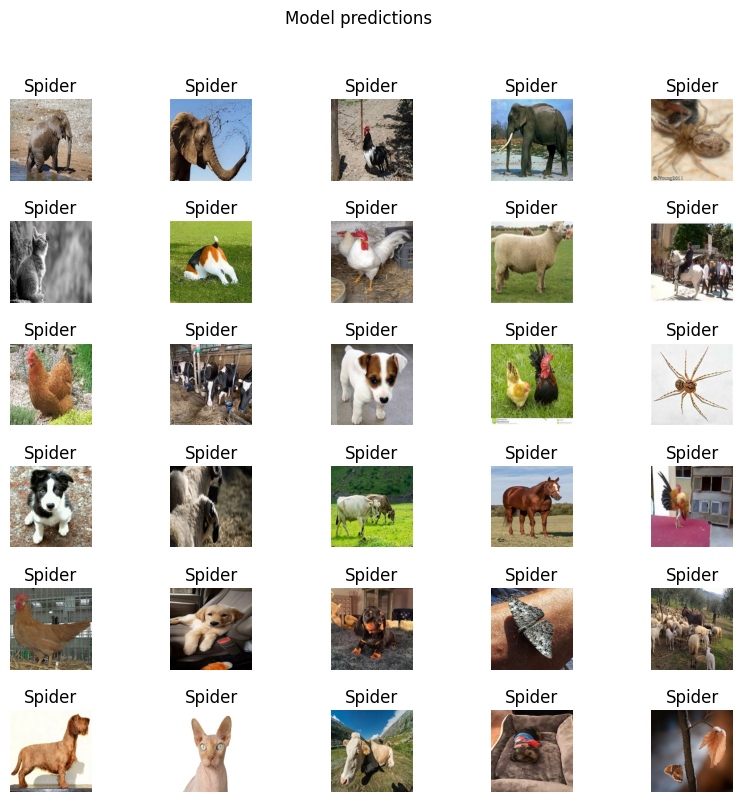

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m1_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

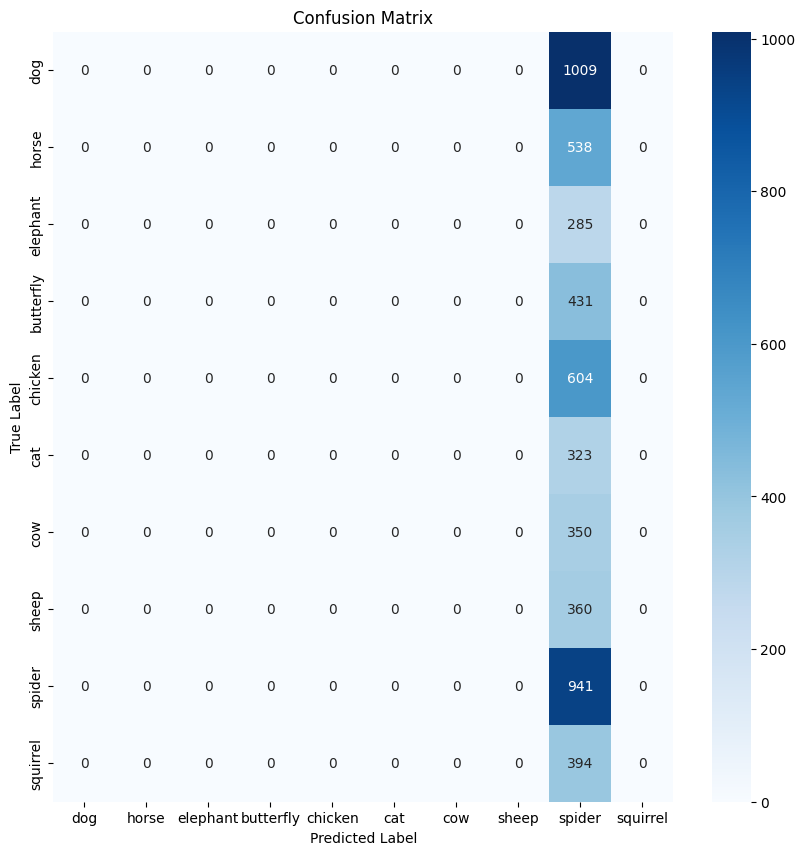

In [ ]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m1_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [ ]:
# Generate classification report
report = classification_report(true_labels, m1_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.00      0.00      0.00       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.18      1.00      0.30       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.18      5235
   macro avg       0.02      0.10      0.03      5235
weighted avg       0.03      0.18      0.05      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [ ]:
test_loss, test_acc = m1.evaluate(test_ds, verbose=1)
print('Test loss Model 1 => ', test_loss)
print('Test accuracy Model 1 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1799 - loss: 8.6508
Test loss Model 1 =>  8.738760948181152
Test accuracy Model 1 =>  0.1797516644001007


# Model JJ_4

In [ ]:
# Import
m1 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m1_JJ.keras")

# Predict
m1_predicted_batch = m1.predict(test_ds)
m1_predicted_id = tf.math.argmax(m1_predicted_batch, axis=-1)
m1_predicted_label_batch = class_names[m1_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step


## Image visualisation

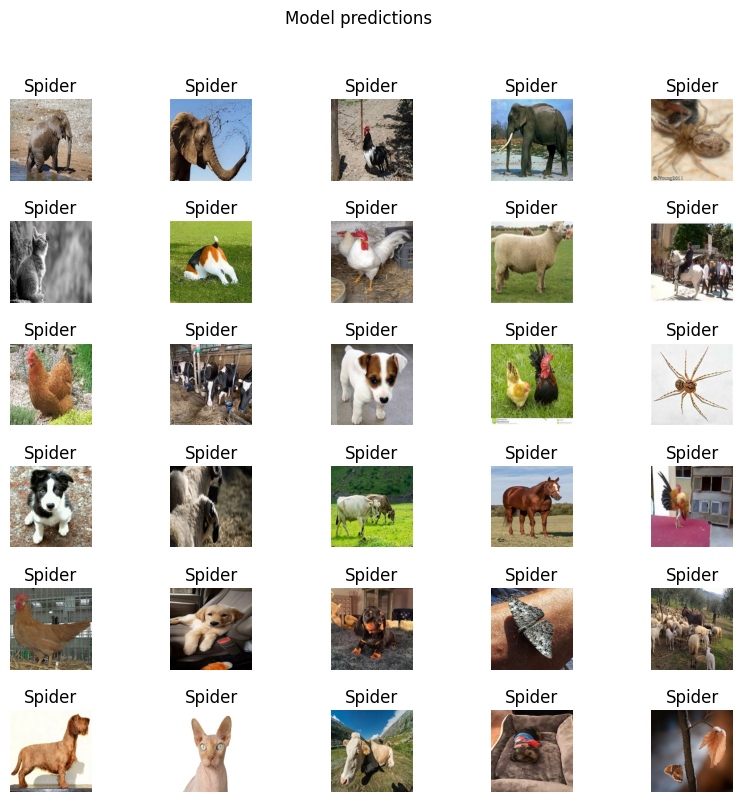

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m1_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

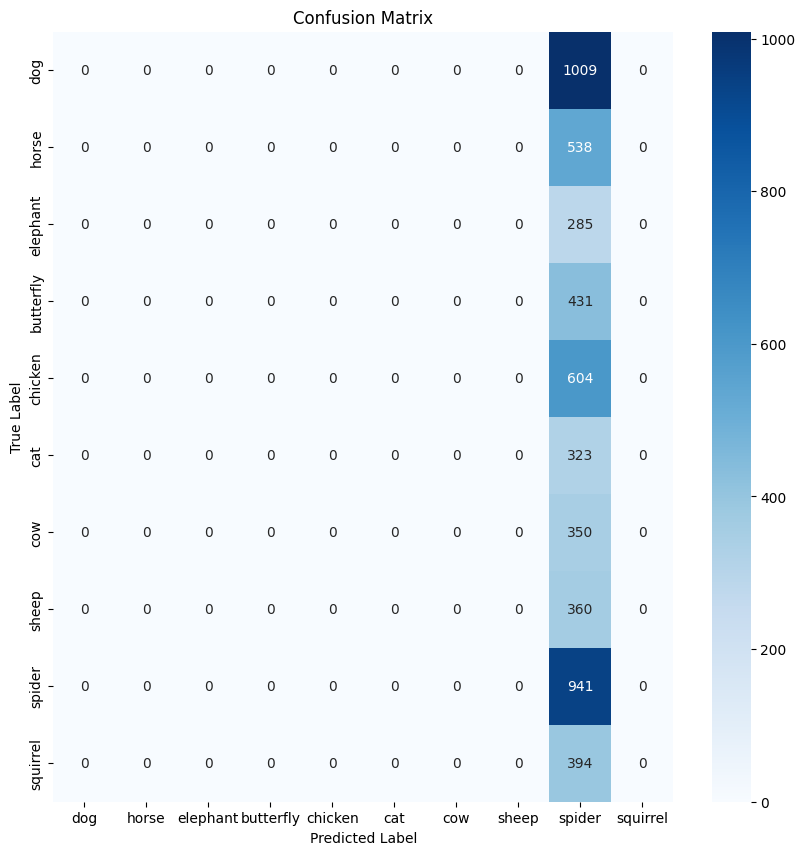

In [ ]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m1_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [ ]:
# Generate classification report
report = classification_report(true_labels, m1_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.00      0.00      0.00       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.18      1.00      0.30       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.18      5235
   macro avg       0.02      0.10      0.03      5235
weighted avg       0.03      0.18      0.05      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [ ]:
test_loss, test_acc = m1.evaluate(test_ds, verbose=1)
print('Test loss Model 1 => ', test_loss)
print('Test accuracy Model 1 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1799 - loss: 8.6508
Test loss Model 1 =>  8.738760948181152
Test accuracy Model 1 =>  0.1797516644001007


# Model JJ_4

In [ ]:
# Import
m1 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m1_JJ.keras")

# Predict
m1_predicted_batch = m1.predict(test_ds)
m1_predicted_id = tf.math.argmax(m1_predicted_batch, axis=-1)
m1_predicted_label_batch = class_names[m1_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step


## Image visualisation

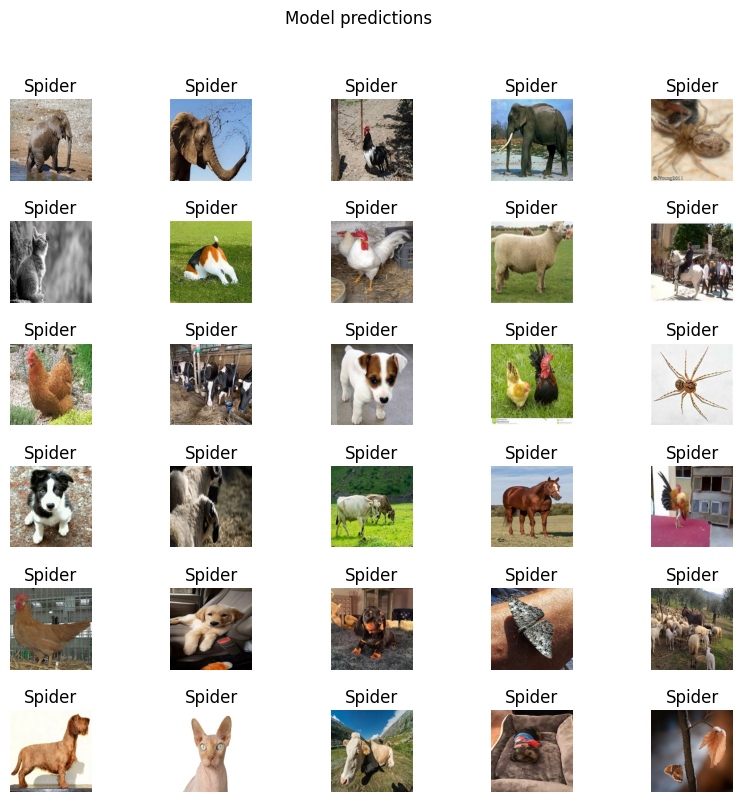

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m1_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

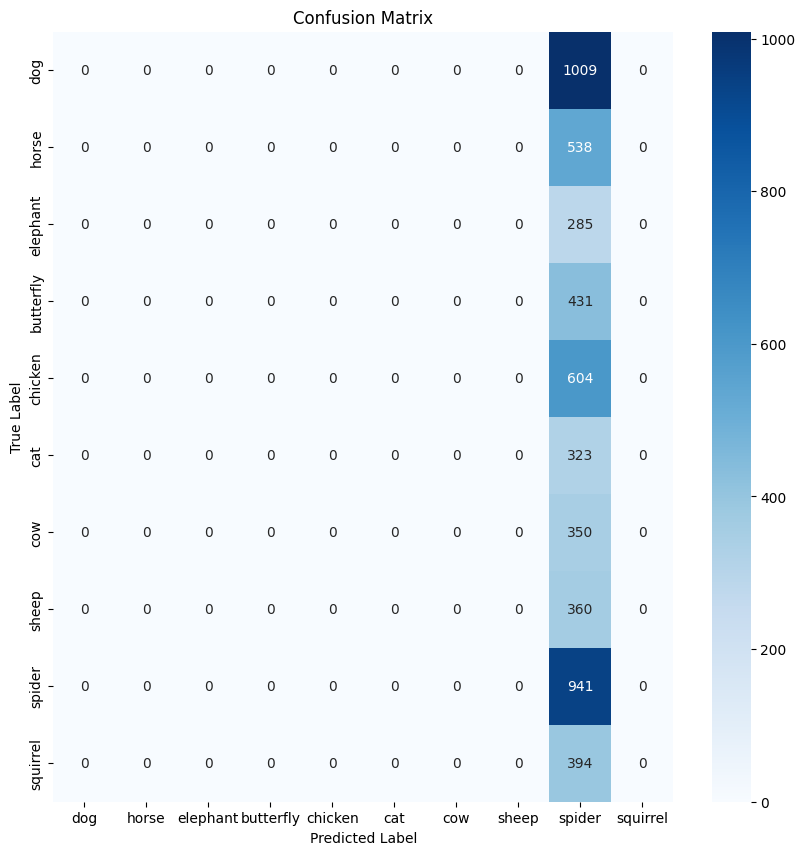

In [ ]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m1_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [ ]:
# Generate classification report
report = classification_report(true_labels, m1_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.00      0.00      0.00       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.18      1.00      0.30       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.18      5235
   macro avg       0.02      0.10      0.03      5235
weighted avg       0.03      0.18      0.05      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [ ]:
test_loss, test_acc = m1.evaluate(test_ds, verbose=1)
print('Test loss Model 1 => ', test_loss)
print('Test accuracy Model 1 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1799 - loss: 8.6508
Test loss Model 1 =>  8.738760948181152
Test accuracy Model 1 =>  0.1797516644001007


# Model JJ_TFH

In [ ]:
# Import
m1 = keras.models.load_model("/content/drive/MyDrive/AI Engineering/Projects/CNN - Image Classification/m1_JJ.keras")

# Predict
m1_predicted_batch = m1.predict(test_ds)
m1_predicted_id = tf.math.argmax(m1_predicted_batch, axis=-1)
m1_predicted_label_batch = class_names[m1_predicted_id]

82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step


## Image visualisation

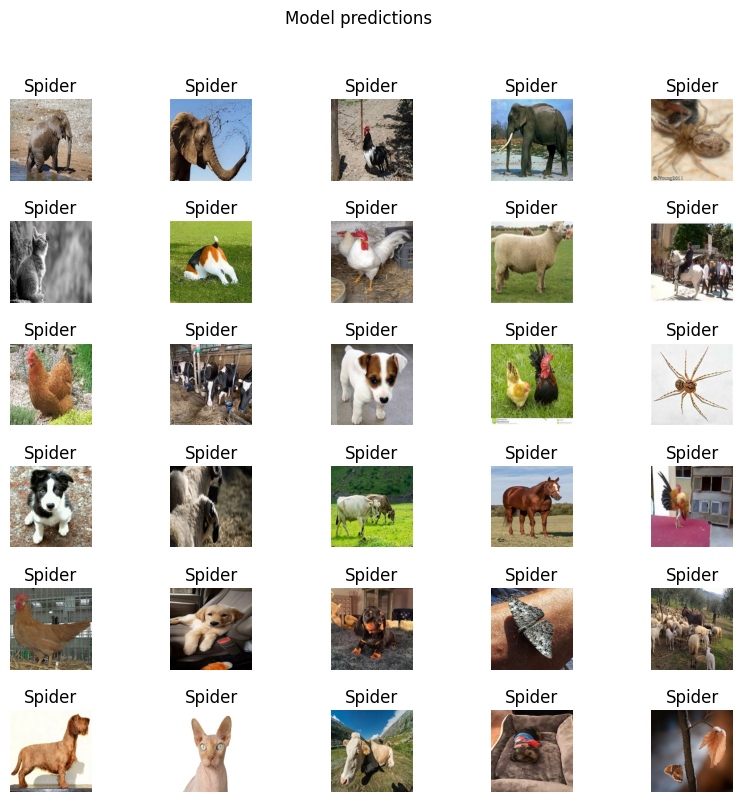

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(m1_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

## Confusion Matrix

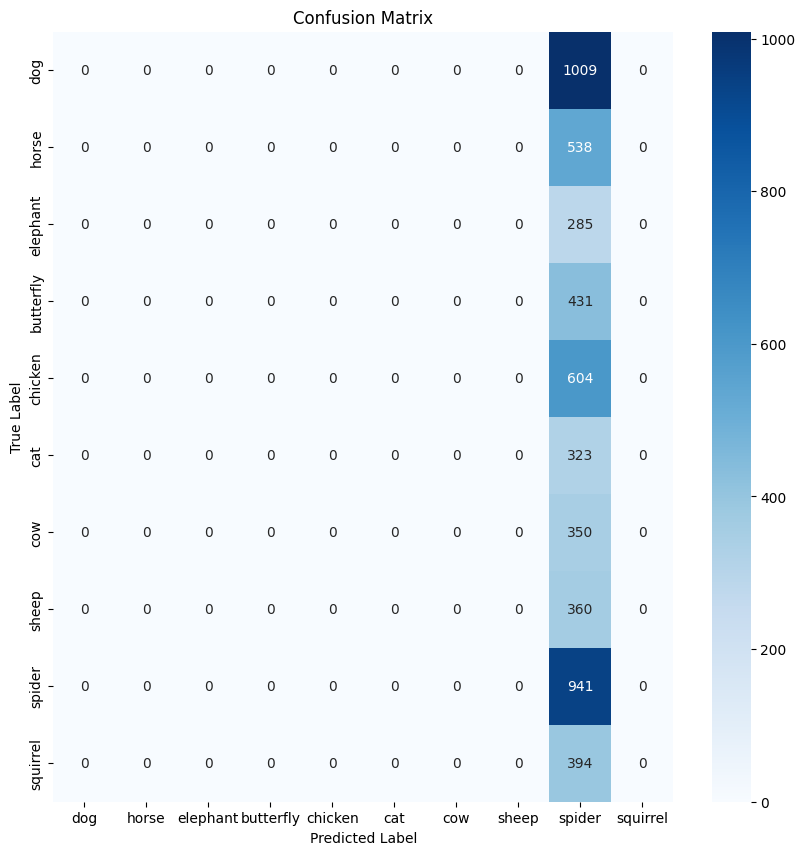

In [ ]:
# Get true labels
true_labels = []
for images, labels in test_ds:
  true_labels.extend(labels.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, m1_predicted_id)

# Display confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [ ]:
# Generate classification report
report = classification_report(true_labels, m1_predicted_id, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         dog       0.00      0.00      0.00      1009
       horse       0.00      0.00      0.00       538
    elephant       0.00      0.00      0.00       285
   butterfly       0.00      0.00      0.00       431
     chicken       0.00      0.00      0.00       604
         cat       0.00      0.00      0.00       323
         cow       0.00      0.00      0.00       350
       sheep       0.00      0.00      0.00       360
      spider       0.18      1.00      0.30       941
    squirrel       0.00      0.00      0.00       394

    accuracy                           0.18      5235
   macro avg       0.02      0.10      0.03      5235
weighted avg       0.03      0.18      0.05      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation

In [ ]:
test_loss, test_acc = m1.evaluate(test_ds, verbose=1)
print('Test loss Model 1 => ', test_loss)
print('Test accuracy Model 1 => ', test_acc)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1799 - loss: 8.6508
Test loss Model 1 =>  8.738760948181152
Test accuracy Model 1 =>  0.1797516644001007
